In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pyLDAvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import chardet
import nltk
from nltk.corpus import stopwords as nltk_stopwords
import os

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

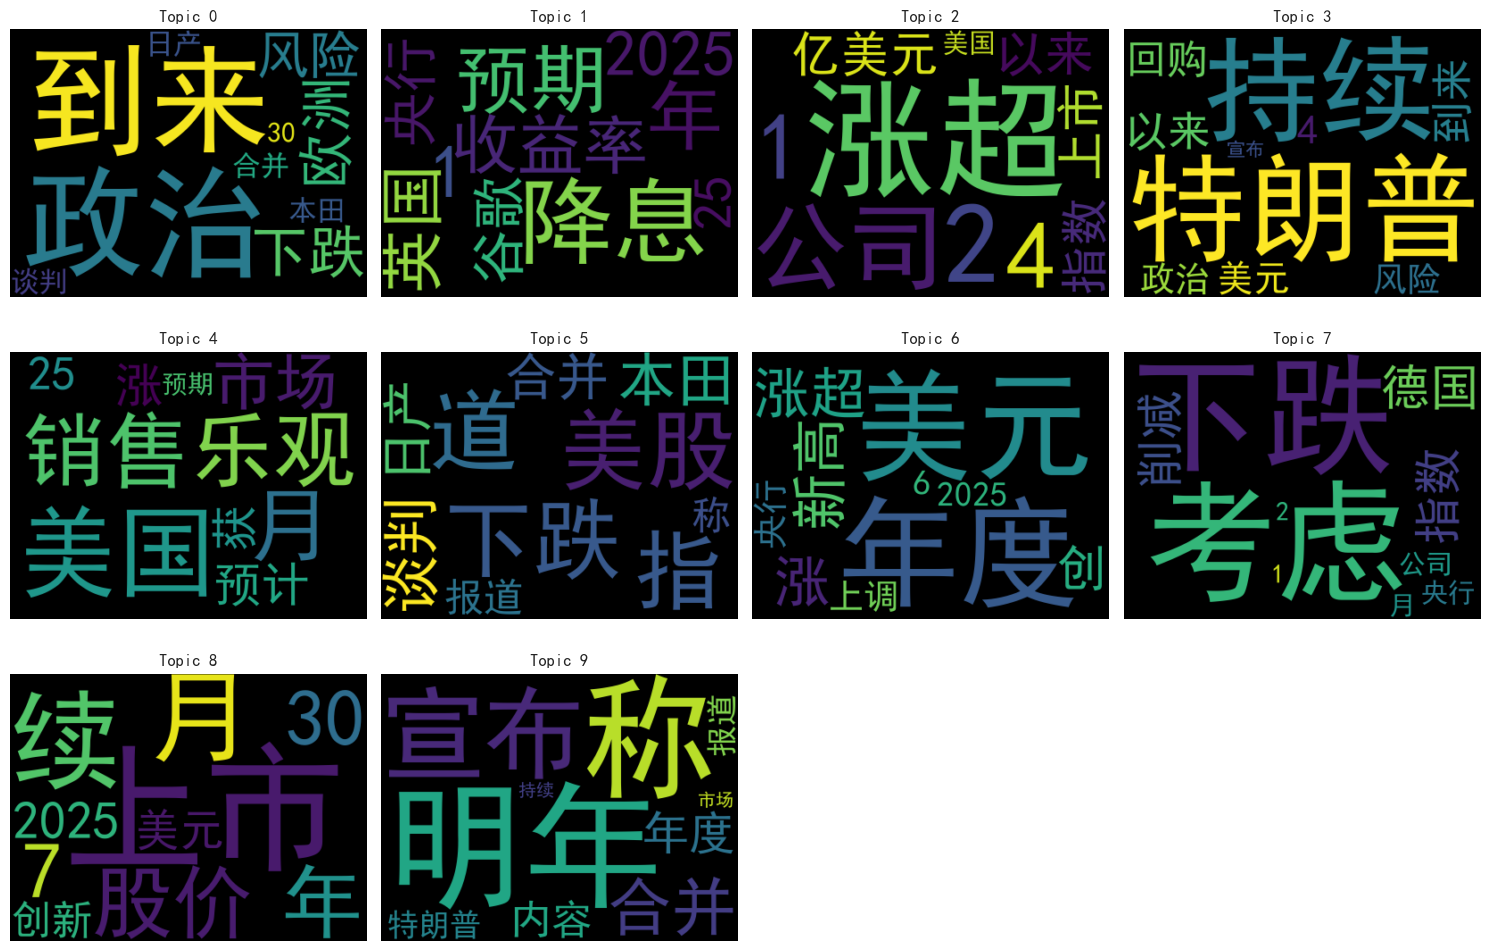

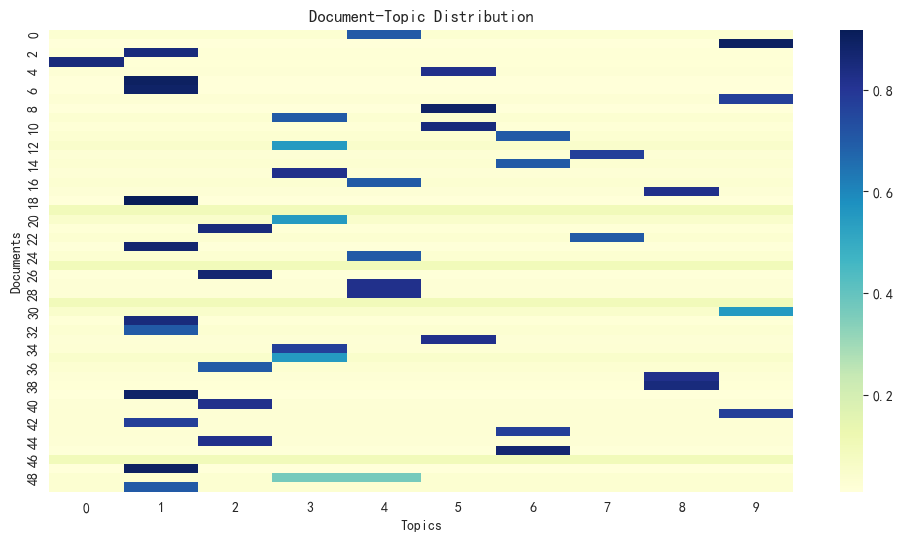

In [35]:
# 定义停用词加载函数
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='gbk') as f:
        chinese_stopwords = f.read().splitlines()
    # 加载nltk的英文停用词
    nltk_english_stopwords = set(nltk_stopwords.words('english'))
        
    # 手动添加的停用词
    manual_stopwords = {'1','2','3','4','5','6','7','8','9','0','逾'}
    # 合并所有停用词，使用 union 方法
    all_stopwords = set().union(
        chinese_stopwords,
        nltk_english_stopwords,
        manual_stopwords
    )
    
    return all_stopwords    

# 文本预处理函数（使用 jieba 进行分词）
def preprocess_text(text, stop_words):
    words = jieba.lcut(text)
    filtered_words = [word for word in words if word.strip() and word not in stop_words]
    return ' '.join(filtered_words)

# 主程序
if __name__ == "__main__":
    # 检测CSV文件编码
    file_path_csv = 'news_titles.csv'
    detected_encoding = chardet.detect(open(file_path_csv, "rb").read())['encoding']
    
    # 加载新闻标题数据
    data = pd.read_csv(file_path_csv, encoding=detected_encoding)
    titles = data['Title'].tolist()

    # 加载停用词
    stop_words = load_stopwords("stop_words.txt")

    # 预处理文档
    processed_titles = [preprocess_text(title, stop_words) for title in titles]

    # 创建文档-词项矩阵
    vectorizer = CountVectorizer(max_df=0.5, min_df=2, token_pattern=r"(?u)\b\w+\b")
    dtm = vectorizer.fit_transform(processed_titles)
    vocabulary = vectorizer.get_feature_names_out()

    # 应用LDA模型
    num_topics = 10  
    lda_model = LDA(n_components=num_topics,topic_word_prior=1/10, random_state=42,learning_method='online',evaluate_every=0,verbose=1,max_iter=100)
    docres = lda_model.fit_transform(dtm)

    # 打印每个主题的前 10 个关键词
    n_top_words = 10
    def print_top_words(model, feature_names, n_top_words):
        for topic_idx, topic in enumerate(model.components_):
            message = f"Topic #{topic_idx}: "
            message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(message)
        print()
    print_top_words(lda_model, vocabulary, n_top_words)

    # 获取每个主题的前 N 个关键词
    lamda = lda_model.components_
    word2id = {word: idx for idx, word in enumerate(vocabulary)}
    topicwords = [[vocabulary[i] for i in topic.argsort()[:-n_top_words - 1:-1]] for topic in eta]

    # 绘制词云
    plt.figure(figsize=(15, 10))
    for k in range(num_topics):
        plt.subplot(3, 4, k + 1)  # 根据主题数量调整 subplot 参数
        wordcloud = WordCloud(font_path='simhei.ttf', width=400, height=300).generate_from_frequencies(
            {word: lamda[k, word2id[word]] for word in topicwords[k]}
        )
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {k}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 绘制热图
    plt.figure(figsize=(12, 6))
    sns.heatmap(docres, cmap='YlGnBu')
    plt.title('Document-Topic Distribution')
    plt.xlabel('Topics')
    plt.ylabel('Documents')
    plt.show()

C:\Users\zhaochenghao\AppData\Local\Temp\ipykernel_24972\3651459107.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Probability', y='Word', data=df_word_probs, palette='viridis')
C:\Users\zhaochenghao\AppData\Local\Temp\ipykernel_24972\3651459107.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Probability', y='Word', data=df_word_probs, palette='viridis')
C:\Users\zhaochenghao\AppData\Local\Temp\ipykernel_24972\3651459107.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Probability', y='Word', data=df_wo

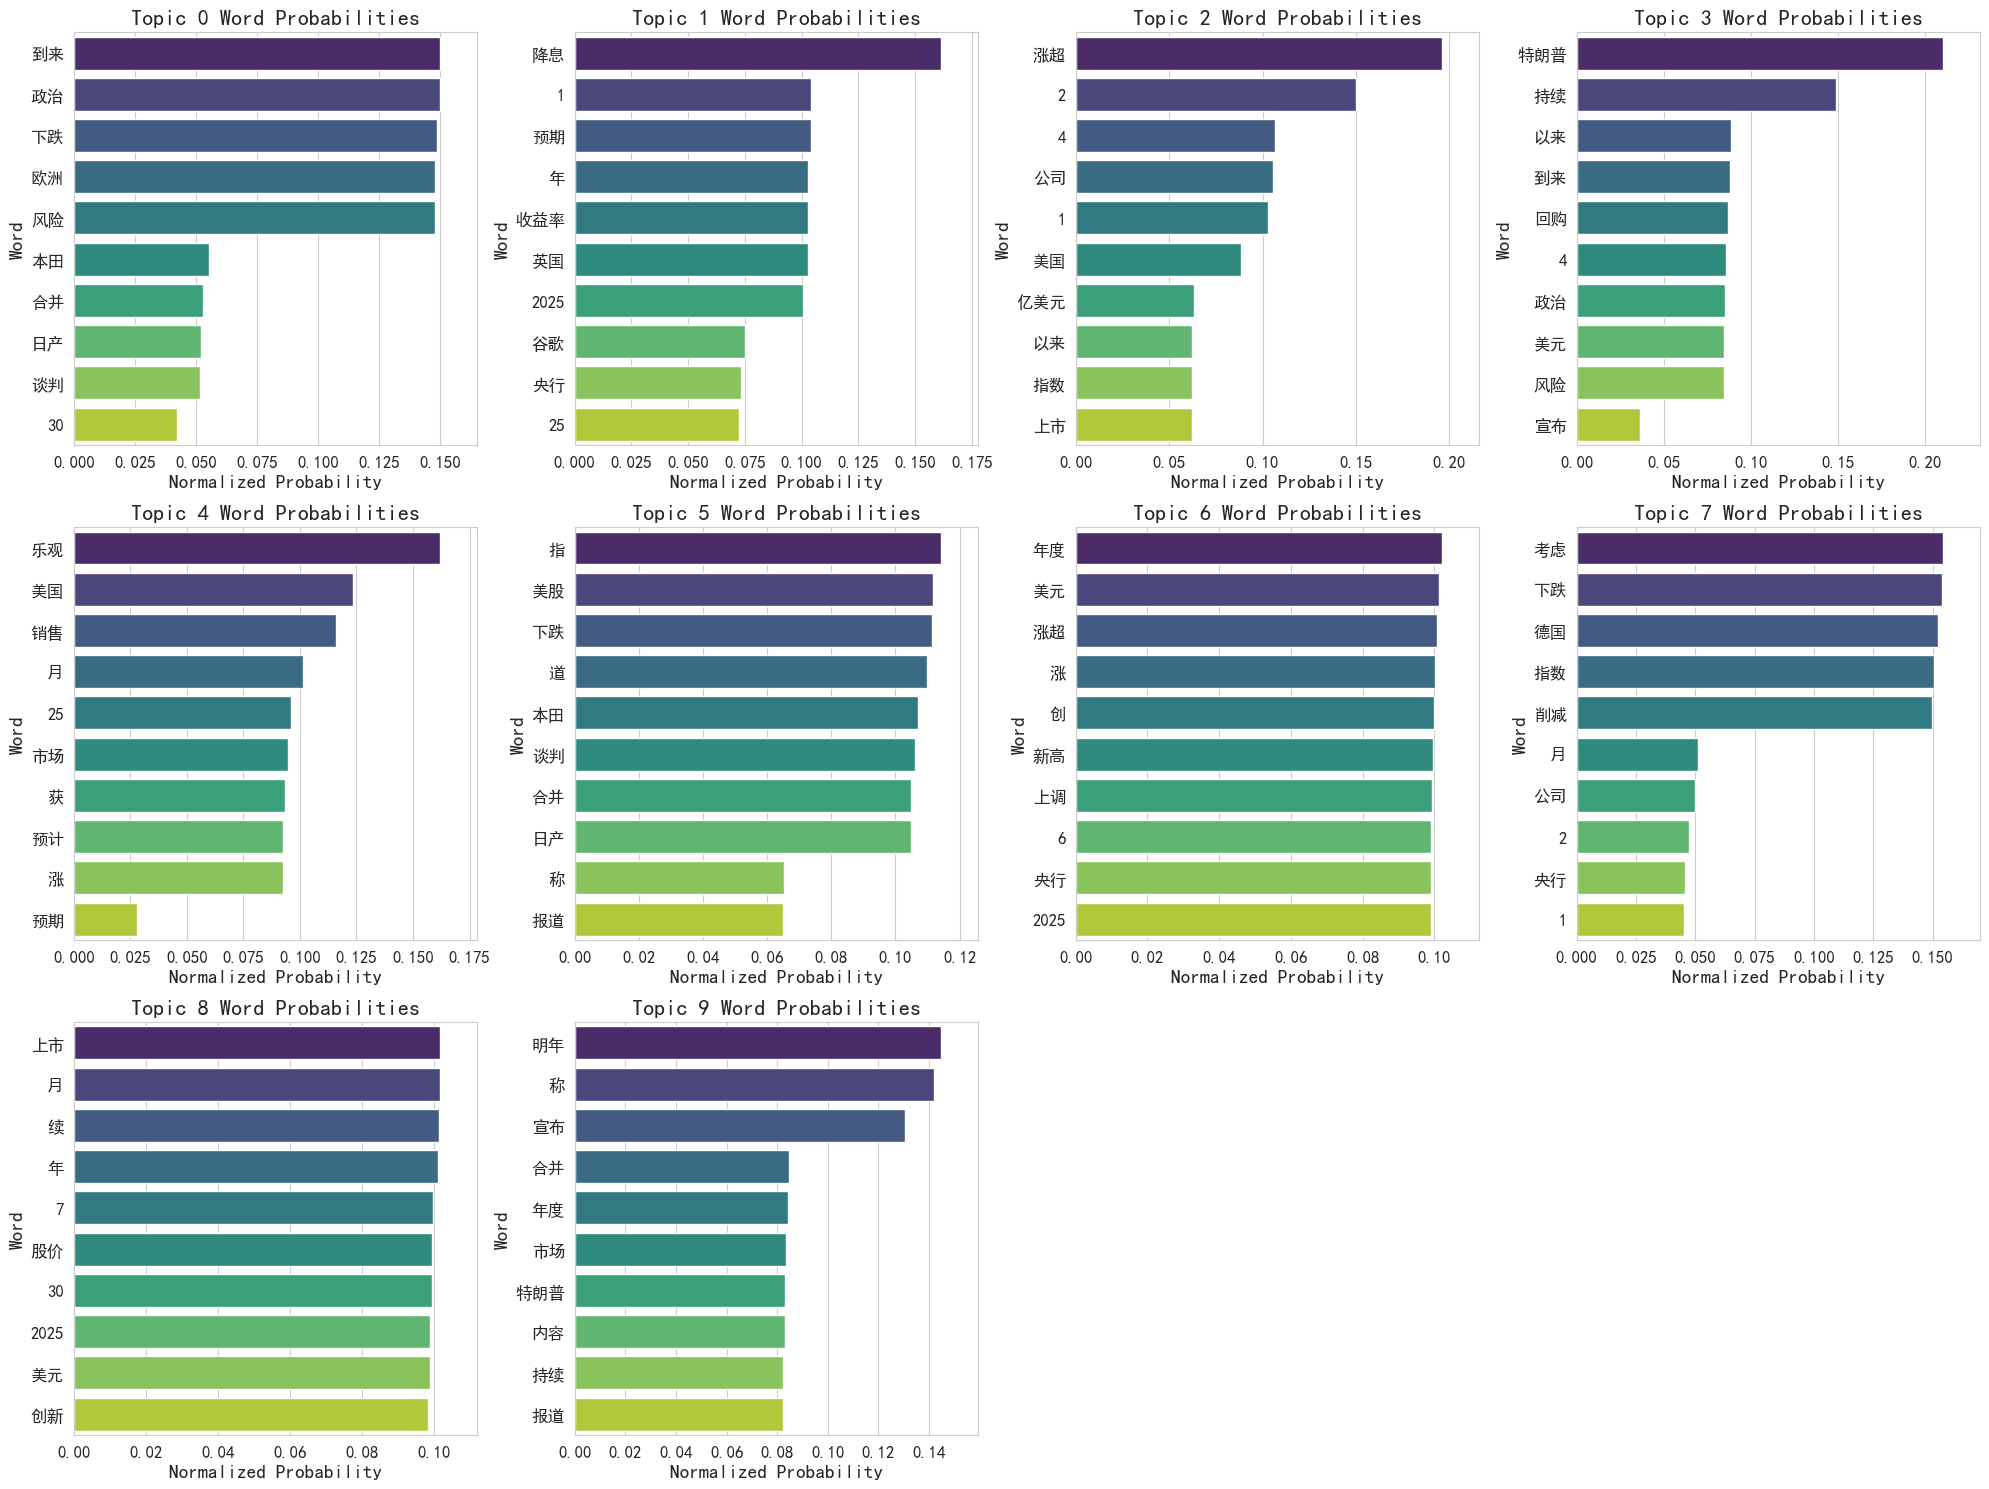

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 设置中文字体，确保中文能够正确显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示问题

# 归一化函数
def normalize(word_probs):
    total_prob = sum(word_probs.values())
    if total_prob > 0:
        return {word: prob / total_prob for word, prob in word_probs.items()}
    else:
        return word_probs  # 如果总和为0，则不进行归一化

# 绘制主题-词概率分布
def plot_topic_word_probabilities(K, eta, topicwords, word2id):
    plt.figure(figsize=(20, 15))  # 增大图表尺寸以便更好地查看细节
    for k in range(K):
        plt.subplot(3, 4, k+1)  # 根据主题数量调整 subplot 参数，这里假设最多有12个主题
        
        # 计算词概率并归一化
        word_probs = {word: eta[k, word2id[word]] for word in topicwords[k]}
        word_probs_normalized = normalize(word_probs)

        # 创建数据框用于绘制条形图
        df_word_probs = pd.DataFrame(list(word_probs_normalized.items()), columns=['Word', 'Probability'])
        df_word_probs = df_word_probs.sort_values(by='Probability', ascending=False)

        # 使用 seaborn 绘制条形图
        ax = sns.barplot(x='Probability', y='Word', data=df_word_probs, palette='viridis')
        ax.set_title(f'Topic {k} Word Probabilities', fontsize=16)
        ax.set_xlabel('Normalized Probability', fontsize=14)
        ax.set_ylabel('Word', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

        # 设置 x 轴限制为最大概率值
        max_prob = df_word_probs['Probability'].max()
        if not np.isnan(max_prob):  # 检查是否为 NaN
            ax.set_xlim(0, max_prob * 1.1)  # 留出一点空间

    plt.tight_layout()
    plt.show()

# 使用示例
if __name__ == "__main__":
    # 假设 K, eta, topicwords, word2id 已经定义
    plot_topic_word_probabilities(num_topics, eta, topicwords, word2id)

In [6]:
import pyLDAvis
import numpy as np

# 假设 dtm, lda_model, docres, word2id 已经定义

# 获取每个词在整个语料库中的总频率
term_frequency = dtm.sum(axis=0).A1

# 获取文档长度（即每个文档中词汇的总数量）
doc_lengths = dtm.sum(axis=1).A1

# 获取文档-主题分布
doc_topic_dists = docres

# 准备 LDA 可视化数据
data = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,  # 主题-词项分布
    doc_topic_dists=doc_topic_dists,         # 文档-主题分布
    doc_lengths=doc_lengths,                  # 文档长度
    vocab=list(word2id.keys()),               # 词汇表
    term_frequency=term_frequency,            # 词频
    mds='tsne',                               # 使用 t-SNE 算法进行多维缩放
    sort_topics=False,                        # 是否按主题重要性排序，默认为 True
    lambda_step=0.2,                          # 控制混合比例的步长，默认是 0.1
    plot_opts={'xlab': 't-SNE 1', 'ylab': 't-SNE 2'}  # 自定义图形选项
)

# 如果你在 Jupyter Notebook 中工作，可以使用 enable_notebook()
pyLDAvis.enable_notebook()

# 显示可视化面板
pyLDAvis.display(data)

In [31]:
lda_model.bound_

193.38365098850176